In [1]:
!pip install mlflow

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.9 MB 15.7 MB/s eta 0:00:01
   ------------------- -------------------- 4.5/8.9 MB 13.8 MB/s eta 0:00:01
   ------------------------------------ --- 8.1/8.9 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 13.4 MB/s  0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 13.0 MB/s  0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 12.4 MB/s  0:00:00
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   -------------------------------------- - 3.4/3.5 MB 16.6 MB/s eta 0:00:01
   ---------------------------------------- 3.5/3.5 MB 14.3 MB/s  0:00:00
   ---------------------------------------- 0.0/764.2 kB ? eta -:--:--
   ---------------------------------------- 764.2

In [1]:
import mlflow

mlflow.set_tracking_uri("http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/")

with mlflow.start_run():
    mlflow.log_param("param1",15)
    mlflow.log_metric("metric1",0.89)

🏃 View run peaceful-penguin-895 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/0/runs/0f488df3d8ea492492cd9f1b35dea155
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/0


In [14]:
import numpy as np
import pandas as pd


In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [16]:
df.dropna(inplace=True)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df = df[~(df['clean_comment'].str.strip()=="")]

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [20]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alqud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alqud\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()

    # Remove trailing and leading whitespaces
    comment = comment.strip()

    # Remove newline characters
    comment = re.sub(r'\n', ' ', comment)

    # Remove non-alphanumeric characters, except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stopwords but retain important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment

In [23]:
df['clean_comment'] = df['clean_comment'].apply(preprocess_comment)
     

In [24]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
vectorizer = CountVectorizer(max_features=10000)
X= vectorizer.fit_transform(df['clean_comment']).toarray()
y=df['category']


In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(36793, 10000))

In [32]:
mlflow.set_tracking_uri("http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/")


In [33]:
mlflow.set_experiment("RF_Baseline")


2025/12/12 15:40:36 INFO mlflow.tracking.fluent: Experiment with name 'RF_Baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://sentiment-analysis-bucket-alqud/mlflow-artifacts/1', creation_time=1765514436336, experiment_id='1', last_update_time=1765514436336, lifecycle_stage='active', name='RF_Baseline', tags={}>

In [34]:
!pip install boto3

   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   -- ------------------------------------- 1.0/14.5 MB 6.3 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/14.5 MB 6.1 MB/s eta 0:00:03
   --------- ------------------------------ 3.4/14.5 MB 5.7 MB/s eta 0:00:02
   -------------- ------------------------- 5.2/14.5 MB 6.5 MB/s eta 0:00:02
   --------------------- ------------------ 7.9/14.5 MB 8.0 MB/s eta 0:00:01
   ------------------------------- -------- 11.3/14.5 MB 9.2 MB/s eta 0:00:01
   ----------------------------------- ---- 12.8/14.5 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 14.5/14.5 MB 9.7 MB/s  0:00:01

   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----

In [35]:
!pip install awscli

   ---------------------------------------- 0.0/4.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.6 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.6 MB ? eta -:--:--
   -------------------- ------------------- 2.4/4.6 MB 10.1 MB/s eta 0:00:01
   -------------------------------------- - 4.5/4.6 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 4.6/4.6 MB 9.2 MB/s  0:00:00
   ---------------------------------------- 0.0/570.5 kB ? eta -:--:--
   ---------------------------------------- 570.5/570.5 kB 9.0 MB/s  0:00:00

  Attempting uninstall: rsa

    Found existing installation: rsa 4.9.1

    Uninstalling rsa-4.9.1:

      Successfully uninstalled rsa-4.9.1

   ---------------------------------------- 0/3 [rsa]
   ------------- -------------------------- 1/3 [docutils]
   ------------- -------------------------- 1/3 [docutils]
   ------------- -------------------------- 1/3 [docutils]
   ------------- -------------------------

In [ ]:
!aws configure

SyntaxError: invalid syntax (3821592265.py, line 1)

🏃 View run RandomForest_Baseline_TraintestSplit at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/1/runs/0e91cf80ba634a599ada43e864d781f0
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/1


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/confusion_matrix.png'

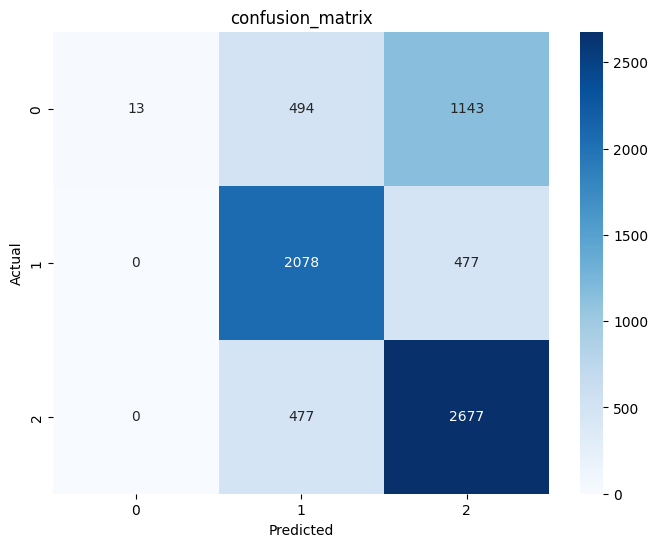

In [ ]:
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)



with mlflow.start_run() as run:
    mlflow.set_tag("mlflow.runName","RandomForest_Baseline_TraintestSplit")
    mlflow.set_tag("experiment_type", "Baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")

    mlflow.set_tag("description","Baseline RandomForest model for sentiment analysis using Bag of words")

    mlflow.log_param("vectorizer_type","CountVectorizer")
    mlflow.log_param("vectorizer_max_features",vectorizer.max_features)

    n_estimators =200
    max_depth=15

    mlflow.log_param("n_estimators",n_estimators)
    mlflow.log_param("max_depth",max_depth)

    model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    mlflow.log_param("accuracy",accuracy)

    classification_rep = classification_report(y_test,y_pred,output_dict=True)

    for label, metrics in classification_rep.items():
        if isinstance(metrics,dict):
            for metric ,value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}",value)

    conf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("confusion_matrix")

    plt.savefig("confusion_matrix.png")
    

    mlflow.sklearn.log_model(model,"random_forest_model")

    df.to_csv("dataset.csv",index=False)
    mlflow.log_artifact("/content/dataset.csv")


print(f"Accuracy: {accuracy}")









In [40]:
mlflow.log_artifact("confusion_matrix.png")

In [41]:
df.to_csv("reddit_prepocessing.csv",index=False)

In [42]:
mlflow.sklearn.log_model(model,"random_forest_model")
df.to_csv("dataset.csv",index=False)
mlflow.log_artifact("/content/dataset.csv")


2025/12/12 16:34:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/dataset.csv'